### ***<p style="color:#b565a7;">Importing Required Libraries</p>***

In [1184]:
import numpy as np                                      #importing numpy library(for numerical operations)
import pandas as pd                                     #importing pandas library(for reading the data)
import matplotlib.pyplot as plt                         #importing matplotlib library(for visualization)
import seaborn as sns                                   #importing seaborn library(for visualization)
import optuna                                           #importing optuna library(for Hyperparameter optimization)
from sklearn.model_selection import train_test_split    #importing train_test_split
from sklearn.preprocessing import StandardScaler        #importing StandardScaler(for standardizing the data)
from sklearn.metrics import r2_score,\
    mean_squared_error,mean_absolute_error              #importing r2_score,mean_squared_error,mean_absolute_error from metrics

from sklearn.linear_model import LinearRegression,\
                                Lasso,Ridge             #importing LinearRegression,Lasso,Ridge models

from sklearn.linear_model import ElasticNet             #importing ElasticNet model
from sklearn.svm import SVR                             #importing SVR model
from sklearn.tree import DecisionTreeRegressor          #importing DecisionTreeRegressor model
from sklearn.ensemble import RandomForestRegressor      #importing RandomForestRegressor model
from sklearn.ensemble import GradientBoostingRegressor  #importing GradientBoostingRegressor model
#from xgboost import XGBRegressor                         #importing XGBRegressor model

from sklearn.model_selection import cross_val_score     #importing cross_val_score for cross validation
from sklearn.model_selection import KFold               #importing KFold for cross validation
from tpot import TPOTRegressor   
import warnings
warnings.filterwarnings('ignore')


### ***Reading into a DataFrame.***

In [1221]:
data=pd.read_csv('t_s1_am_6am.csv')                     #Reading the data from the csv file

data.head(2)                                            #Displaying the first 3 rows of the data

,VV,VH,smap_am,soil_moisture
0,-9.058618,-15.982408,0.284554,0.301
1,-9.511266,-18.085192,0.218601,0.172


In [1186]:
r,c=data.shape                                             #getting the number of rows and columns in the data
print(f"Data has {r} rows, {c} columns.")                  #displaying the number of rows, columns in the data
print(f"Has {c-1} Independent features and 1 Dependent feature.")#displaying the number of features and target in the data
print(f"Data has {data.duplicated().sum()} duplicated rows.") #displaying the number of duplicated rows in the data
print(f"Data has {data.isnull().sum().sum()} missing values.") #displaying the number of missing values in the data

Data has 30747 rows, 4 columns.
Has 3 Independent features and 1 Dependent feature.
Data has 13 duplicated rows.
Data has 0 missing values.


***Copying and removing dupes***

In [1187]:
data_copy = data.copy()                                    #making a copy of the data
data_copy.drop_duplicates(inplace=True)                    #dropping the duplicated rows

r,c=data_copy.shape                                             #getting the number of rows and columns in the data
print(f"New data has {r} rows, {c} columns.")                  #displaying the number of rows, columns in the data

New data has 30734 rows, 4 columns.


### ***Features info***

In [1188]:
data_copy.info()                                             #Displaying the information of the data

<class 'pandas.core.frame.DataFrame'>
Index: 30734 entries, 0 to 30746
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VV             30734 non-null  float64
 1   VH             30734 non-null  float64
 2   smap_am        30734 non-null  float64
 3   soil_moisture  30734 non-null  float64
dtypes: float64(4)
memory usage: 1.2 MB


### ***Statistical data of the dataset***

In [1189]:
data_copy.describe().T                                       #Displaying the statisticAal information of the data(transpose)

,count,mean,std,min,25%,50%,75%,max
VV,30734.0,-9.196386,2.943877,-26.670000,-10.846726,-9.105106,-7.631884,5.057968
VH,30734.0,-16.418210,3.413933,-35.349515,-18.015636,-15.784743,-14.172247,-4.289361
smap_am,30734.0,0.147196,0.121549,0.000000,0.070999,0.125320,0.202307,0.674961
soil_moisture,30734.0,0.412658,17.750718,0.000000,0.078000,0.174000,0.279000,1396.570000


### ***Histplots of Independent features***

Text(0.5, 1.0, 'smap_am distribution')

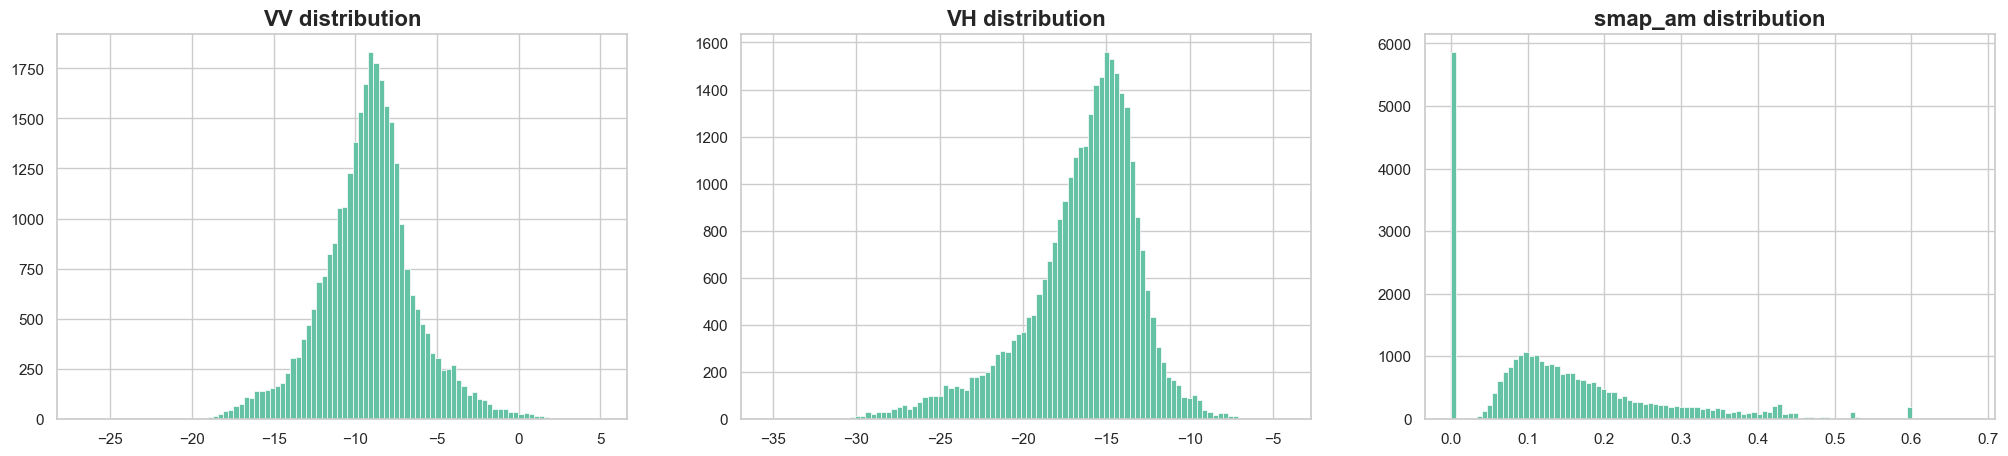

In [1190]:
# Set style and palette
sns.set_theme(style="whitegrid")                # White grid for cleaner look
sns.set_palette("Set2")                         # Soft, colorful palette

cols=['VV', 'VH', 'smap_am']                    # Columns to plot
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(25,5))

axes[0].hist(data['VV'], bins=100, linewidth=0.5, edgecolor="white")
axes[0].set_title("VV distribution",fontsize=16, fontweight='bold')

axes[1].hist(data['VH'], bins=100, linewidth=0.5, edgecolor="white")
axes[1].set_title("VH distribution",fontsize=16, fontweight='bold')

axes[2].hist(data['smap_am'], bins=100, linewidth=0.5, edgecolor="white")
axes[2].set_title("smap_am distribution",fontsize=16, fontweight='bold')

### ***Boxplots of Independent features***

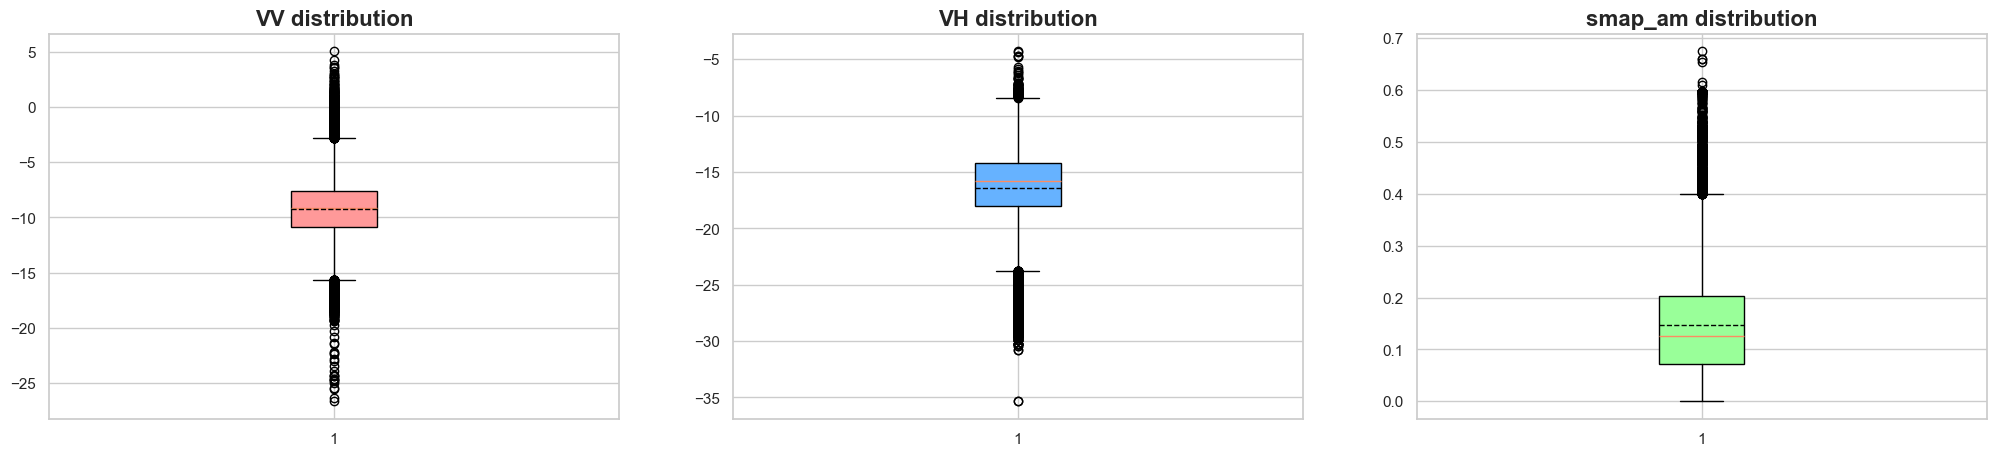

In [1191]:
sns.set_theme(style="whitegrid")                # White grid for cleaner look
sns.set_palette("Set2")                         # Soft, colorful palette

cols=['VV', 'VH', 'smap_am']                    # Columns to plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))

colors = ['#FF9999', '#66B2FF', '#99FF99']      # Colors for each box plot

for ax, col, color in zip(axes, cols, colors):
    box = ax.boxplot(data[col], patch_artist=True, meanline=True, showmeans=True,
                     meanprops={"color": "black", "linewidth": 1})
    for patch in box['boxes']:
        patch.set_facecolor(color)
    ax.set_title(f"{col} distribution", fontsize=16, fontweight='bold')

### ***Correalation map***
- ***A correlation map (also called a correlation matrix or heatmap) is a visual representation of the correlation coefficients between variables in a dataset. It shows how strongly or weakly variables are related to each other.***
- ***Measures the strength and direction of the relationship between two variables. Values lie between -1 to +1.***
- ***+1 means perfect positive correlation (both variables increase together). 0 means no correlation (variables are independent).
-1 means perfect negative correlation (one variable increases while the other decreases).***

<Axes: >

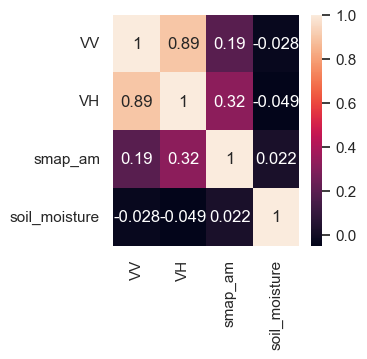

In [1192]:
# Set style and palette
#sns.set_theme(style="whitegrid")                # White grid for cleaner look
#sns.set_palette("Set2")                         # Soft, colorful palette

plt.figure(figsize=(3,3))
sns.heatmap(data_copy.corr(method='spearman'), annot=True)

### ***Dealing with outliers***

In [1194]:
for col in data_copy.columns:
    Q1 = data_copy[col].quantile(0.25)
    Q3 = data_copy[col].quantile(0.75)

    IQR = Q3 - Q1
    #print(f'IQR of {col} --> {IQR}')
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Find outliers in the specified column
    outliers = data_copy[(data_copy[col] < lower_bound) | (data_copy[col] > upper_bound)][col]
    print(f'{len(outliers)*100/r}% of {col} are outliers.')

    # Replace outliers with the respective column bounds.
    if col=='soil_moisture':
        data_copy = data_copy[data_copy['soil_moisture'] <= 1]
    else:
      data_copy[col] = np.where(data_copy[col] < lower_bound, lower_bound, data_copy[col])
      data_copy[col] = np.where(data_copy[col] > upper_bound, upper_bound, data_copy[col])

4.802498861196069% of VV are outliers.
4.610529055768855% of VH are outliers.
5.118110236220472% of smap_am are outliers.
0.3383874536344114% of soil_moisture are outliers.


### ***Histplots of Independent features after replacing outliers.***

Text(0.5, 1.0, 'smap_am distribution')

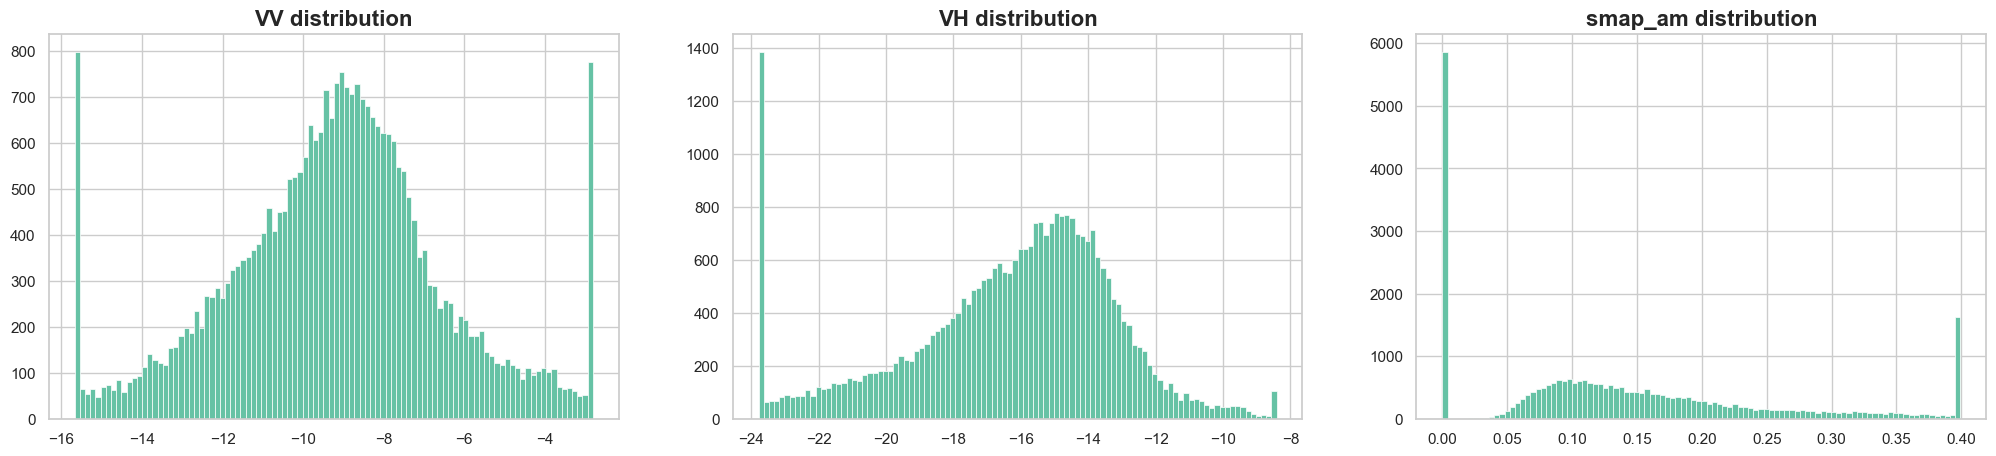

In [1195]:
# Set style and palette
sns.set_theme(style="whitegrid")                # White grid for cleaner look
sns.set_palette("Set2")                         # Soft, colorful palette

cols=['VV', 'VH', 'smap_am']                    # Columns to plot
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(25,5))

axes[0].hist(data_copy['VV'], bins=100, linewidth=0.5, edgecolor="white")
axes[0].set_title("VV distribution",fontsize=16, fontweight='bold')

axes[1].hist(data_copy['VH'], bins=100, linewidth=0.5, edgecolor="white")
axes[1].set_title("VH distribution",fontsize=16, fontweight='bold')

axes[2].hist(data_copy['smap_am'], bins=100, linewidth=0.5, edgecolor="white")
axes[2].set_title("smap_am distribution",fontsize=16, fontweight='bold')

### ***Adding new features***

In [1196]:
def Add_cols(data_copy):
    # Create new features based on existing ones
    data_copy["ratio"] = data_copy["VH"] / data_copy["VV"] 
    data_copy['difference']=(data_copy['VV']-data_copy['VH'])**0.1
    data_copy["mult"] = data_copy["VH"]* data_copy["VV"]*(data_copy["smap_am"]+1e-5)**0.5
    return data_copy
data_copy=Add_cols(data_copy)                          #Adding new columns to the data

In [1224]:
data_copy.describe().T                                  #Displaying the statisticAal information of the data(transpose)

,count,mean,std,min,25%,50%,75%,max
VV,30712.0,-9.202340,2.755166,-15.668990,-10.847767,-9.105670,-7.631341,-2.809620
VH,30712.0,-16.332557,3.159979,-23.780718,-18.019482,-15.785823,-14.170208,-8.407165
smap_am,30712.0,0.143675,0.112202,0.000000,0.070944,0.125207,0.202172,0.399268
soil_moisture,30712.0,0.185072,0.125689,0.000000,0.078000,0.174000,0.279000,0.883000
ratio,30712.0,1.884203,0.500234,1.247284,1.623252,1.730893,1.910132,6.455404
difference,30712.0,1.215092,0.022786,1.144909,1.197085,1.212691,1.231584,1.339125
mult,30712.0,49.901107,34.348313,0.074696,23.627274,52.725632,71.749558,195.958879


### ***Correlation map with new features***

<Axes: >

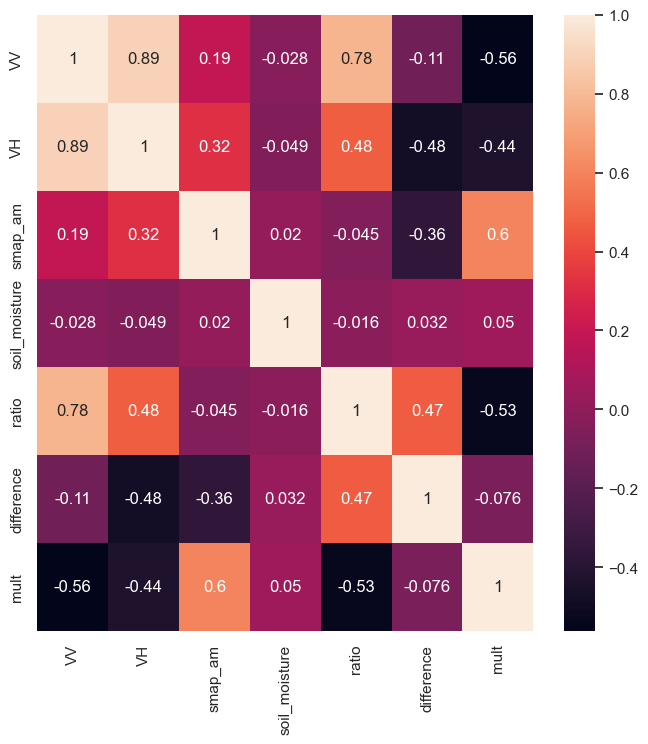

In [1222]:
plt.figure(figsize=(8,8))
sns.heatmap(data_copy.corr(method='spearman'), annot=True)

### ***Histplots of new features***

Text(0.5, 1.0, 'mult distribution')

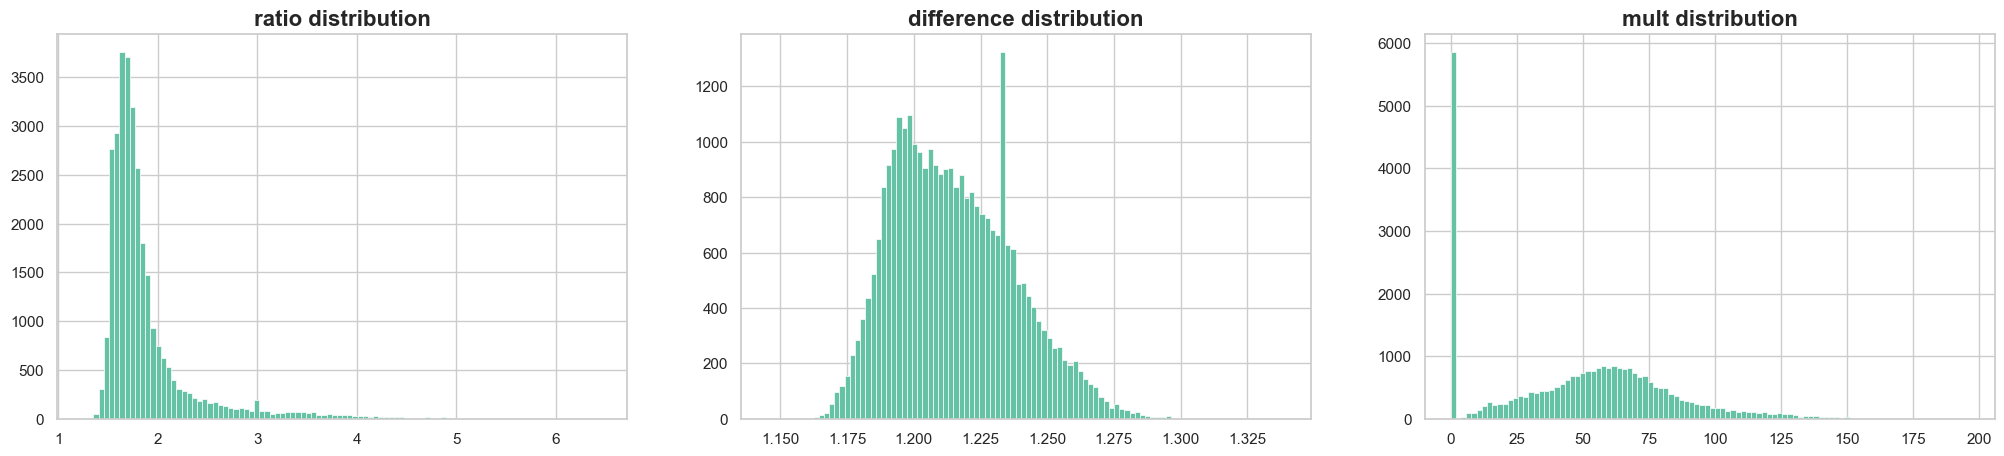

In [1223]:
sns.set_theme(style="whitegrid")                # White grid for cleaner look
sns.set_palette("Set2")                         # Soft, colorful palette

cols=['VH', 'smap_am','ratio','difference','mult']                    # Columns to plot
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(25,5))

axes[0].hist(data_copy['ratio'], bins=100, linewidth=0.5, edgecolor="white")
axes[0].set_title("ratio distribution",fontsize=16, fontweight='bold')

axes[1].hist(data_copy['difference'], bins=100, linewidth=0.5, edgecolor="white")
axes[1].set_title("difference distribution",fontsize=16, fontweight='bold')

axes[2].hist(data_copy['mult'], bins=100, linewidth=0.5, edgecolor="white")
axes[2].set_title("mult distribution",fontsize=16, fontweight='bold')

### ***Splitting into Train and Test data*** 

***Removed VV feature as it was highly correlated***

In [1202]:
X_train, X_test, y_train, y_test = train_test_split(data_copy.drop(['VV','soil_moisture'], axis=1), data_copy['soil_moisture'], test_size=0.2, random_state=42) #Splitting the data into train and test

### ***<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html">Power Transformers</a>***

>class sklearn.preprocessing.PowerTransformer(method='yeo-johnson', *, standardize=True, copy=True)

1. ***Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.***

2. ***Handles Skewed Data: Useful for datasets with highly skewed features.***

3. ***Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood(sklearn) and also done by Bayesian statistic but not in sklearn.***

4. ***Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.***

5. ***By default, zero-mean, unit-variance normalization is applied to the transformed data so don't need to apply standardization.***

In [1205]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')  # Handles both positive and negative values
X_train = scaler.fit_transform(X_train)

print(X_train[:5])

X_test = scaler.transform(X_test)

[[ 0.67612136  0.7912884  -0.50122234 -1.30777999  0.325271  ]
 [-0.36165815 -0.34677029  0.57834388  0.85763375  0.10227454]
 [ 0.07753474  0.23925364 -1.38895333 -1.47624222  0.50363162]
 [ 0.42189984  0.53059828 -0.73293345 -1.22838569  0.37705898]
 [ 0.98606831  1.41688923 -0.24462926 -1.42904052  0.37090868]]


### ***Training Models***

In [1216]:
import xgboost as xgb
models_dict={
    "LinearRegression":LinearRegression(),
    "ElasticNet":ElasticNet(),
    "SupportVector":SVR(),
    "GradientBoost":GradientBoostingRegressor(),
    "XgbRegressor":xgb.XGBRegressor(n_estimators = 10, seed = 123)     
}

In [1217]:
for i in range(len(list(models_dict))):
    model=list(models_dict.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    train_r2=r2_score(y_train,y_train_pred)
    train_mse=mean_squared_error(y_train,y_train_pred)
    train_mae=mean_absolute_error(y_train,y_train_pred)


    test_r2=r2_score(y_test,y_test_pred)
    test_mse=mean_squared_error(y_test,y_test_pred)
    test_mae=mean_absolute_error(y_test,y_test_pred)


    print(list(models_dict.keys())[i])
    print("Training R2:{:.4f}".format(train_r2))
    print("Training MSE:{:.4f}".format(train_mse))
    print("Training MAE:{:.4f}".format(train_mae))

    print("Test R2:{:.4f}".format(test_r2))
    print("Test MSE:{:.4f}".format(test_mse))
    print("Test MAE:{:.4f}".format(test_mae))
    
    print('\n')


LinearRegression
Training R2:0.0065
Training MSE:0.0157
Training MAE:0.1055
Test R2:0.0129
Test MSE:0.0154
Test MAE:0.1043


ElasticNet
Training R2:0.0000
Training MSE:0.0158
Training MAE:0.1059
Test R2:-0.0001
Test MSE:0.0156
Test MAE:0.1050


SupportVector
Training R2:0.0647
Training MSE:0.0148
Training MAE:0.1017
Test R2:0.0603
Test MSE:0.0147
Test MAE:0.1009


GradientBoost
Training R2:0.0766
Training MSE:0.0146
Training MAE:0.1014
Test R2:0.0587
Test MSE:0.0147
Test MAE:0.1015


XgbRegressor
Training R2:0.1138
Training MSE:0.0140
Training MAE:0.0991
Test R2:0.0685
Test MSE:0.0145
Test MAE:0.1008




### ***Optimizing using Optuna Library***

In [1208]:
def objective(trial):
    # Define hyperparameters to tune
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10)
    }

    # Train XGBoost Regressor
    model = xgb.XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)

    # Predict on test set
    preds = model.predict(X_test)

    # Evaluate performance (Minimize RMSE)
    r2 = r2_score(y_test, preds)
    return r2


In [1209]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best parameters and the best R2 score
print("Best parameters: ", study.best_params)
print("Best R2 score: ", study.best_value)

[I 2024-12-27 15:55:30,984] A new study created in memory with name: no-name-9111f808-fbcd-40ae-98ef-69134222aaa5
[I 2024-12-27 15:55:32,193] Trial 0 finished with value: -0.00010421745237132463 and parameters: {'n_estimators': 631, 'max_depth': 3, 'learning_rate': 0.08523539151283148, 'subsample': 0.6088622290573342, 'colsample_bytree': 0.9013807602696786, 'gamma': 2.804551252376755, 'reg_alpha': 6.2636438980886835, 'reg_lambda': 9.016062153012976}. Best is trial 0 with value: -0.00010421745237132463.
[I 2024-12-27 15:55:32,488] Trial 1 finished with value: -9.704456273662565e-05 and parameters: {'n_estimators': 177, 'max_depth': 8, 'learning_rate': 0.2574732954566808, 'subsample': 0.7472676515710804, 'colsample_bytree': 0.7554855291949475, 'gamma': 4.483255452444028, 'reg_alpha': 9.367734309437408, 'reg_lambda': 0.5553595565267033}. Best is trial 1 with value: -9.704456273662565e-05.
[I 2024-12-27 15:55:34,168] Trial 2 finished with value: -9.297808660901907e-05 and parameters: {'n_e

Best parameters:  {'n_estimators': 1474, 'max_depth': 7, 'learning_rate': 0.010987976966580392, 'subsample': 0.9846668944684622, 'colsample_bytree': 0.9914711561144494, 'gamma': 0.014713095531756933, 'reg_alpha': 0.04889997308887839, 'reg_lambda': 2.6409546718498005}
Best R2 score:  0.07648201057454196


In [1220]:
kf = KFold(n_splits=100, shuffle=True, random_state=42)  # 50 folds

# Scoring (MSE and R2)
mse_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

# Metrics
print("MSE: ", -mse_scores.mean())  # Convert to positive values
print("MAE: ", -mae_scores.mean())
print("R2: ", r2_scores.mean())

MSE:  0.014870714502490091
MAE:  0.10193053167945236
R2:  0.05861020944746502
